In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
def boolize(x):
    map_dict = {'Yes': True, 
                'No' : False,
                'Unclear': True
               }
    ret = []
    for item in x:
        ret.append(map_dict[item])
    return ret

def dice_score(x,y):
    num = 2*len(np.intersect1d(x,y))
    denom = len(x)+len(y)
    return num/denom

In [39]:
loc_lat = pd.read_csv('Review of our stim seizures - LFS.csv').drop(['Patient','Unnamed: 23'],axis=1)
loc_lat.dropna(how = 'any',subset=['Stim seizure contact'],inplace=True)

In [40]:
loc_lat.columns

Index(['hupsubjno', 'Implant coverage', 'Spontaneous SOZ', 'emuimplant_soz',
       'ieeg_ictal_onset_electrodes', 'ieeg_ictal_onset_anat_lat',
       'ieeg_ictal_onset_anat_spec', 'cceps_run1_pulsewidth', 'cceps_run1_sz',
       'Stim seizure contact', 'cceps_run1_soz_electrodes', 'Stim SOZ',
       'Concordant lat?', 'Concordant loc?',
       'Was there stim contralateral to seizure site?', 'cceps_run1_szelecs',
       'cceps_run1_soz_electrodes.1', 'cceps_run1_seizure_typical',
       'Typical semiology?', 'Semiology notes', 'Complications', 'Math'],
      dtype='object')

In [58]:
loc_lat[loc_lat.columns[:14]].head(20)

,hupsubjno,Implant coverage,Spontaneous SOZ,emuimplant_soz,ieeg_ictal_onset_electrodes,ieeg_ictal_onset_anat_lat,ieeg_ictal_onset_anat_spec,cceps_run1_pulsewidth,cceps_run1_sz,Stim seizure contact,cceps_run1_soz_electrodes,Stim SOZ,Concordant lat?,Concordant loc?
10,224.0,B/L,Right hippocampus,right hippocampus,"RB2, RB3, RC2",2.0,hippocampus,300.0,1.0,Left hippocampus,"LB1, LB2, LB3, LB4, LB5, LC1, LC2, LC3, LC4, L...",Left hippocampus,No,Yes
11,225.0,R,Right temporal neocortex,temporal neocortex,"RT4, RT5",2.0,temporal neocortex,300.0,1.0,RIght hippocampus,"RB1, RB2, RB3, RB4",RIght hippocampus,Yes,No
13,229.0,L,Left hippocampus,"Epilepsy, Focal Epilepsy Left Lateralization, ...","LB1, LB2, LA1, LA2",1.0,mesial temporal,300.0,1.0,Left near-hippocampus (peri-hippocampal lesion),"LB1, LB2, LC1, LC2, LC3",Left hippocampus,Yes,Yes
14,230.0,L,Left hippocampus,Focal Epilepsy,"LC1, LC2, LC3, LB1, LB2",1.0,hippocampus,500.0,1.0,Left hippocampus,"LC1, LC2, LC3, LC4",Left hippocampus,Yes,Yes
16,235.0,L,Left hippocampus,"Number of seizures captured: 13(5 FIAS, & 8 el...","LC1, LC2, LB2, LB3",1.0,hippocampal tail/body,500.0,1.0,Left amygdala,"LA1, LA2, LA3, LB1, LB2, LB3, LC1, LC2, LC3, L...",Left amygdala and hippocampus,Yes,Yes
18,238.0,L,Left hippocampus,NaN,"LB1, LB2, LB3, LC1, LC2, LC3",1.0,hippocampus,500.0,1.0,Left hippocampus,"LB1, LB2, LB3, LC1, LC2, LC3",Left hippocampus,Yes,Yes
23,246.0,L,Left hippocampus,left hippocampus,NaN,1.0,hippocampus,500.0,1.0,Left hippocampus,"LA1, LA2, LA3, LA4, LB1, LB2, LB3, LB4, LC1, L...",Left amygdala and hippocampus,Yes,Yes
24,247.0,R,Right parietooccipital,right parietooccipital FCD,RP1-3,2.0,parietooccipital,500.0,1.0,Right parietooccipital,NaN,Right parietooccipital,Yes,Yes
26,249.0,B/L,Broad,broad - both left mesial temporal and various ...,NaN,3.0,broad,500.0,1.0,Right hippocampus,RA1,Right amygdala,Unclear,Unclear
27,250.0,B/L,Broad,"broad (left TPO, left basal/temporal, right hi...",NaN,NaN,NaN,500.0,1.0,Left hippocampus,"LB1, LC1",Left hippocampus,Unclear,Unclear


In [42]:
concordance = loc_lat[['Concordant lat?','Concordant loc?']].apply(boolize)
concordance["combined"] = pd.DataFrame(concordance['Concordant lat?'] & concordance['Concordant loc?'])

Text(0.5, 1.0, 'p-value: 0.03515625')

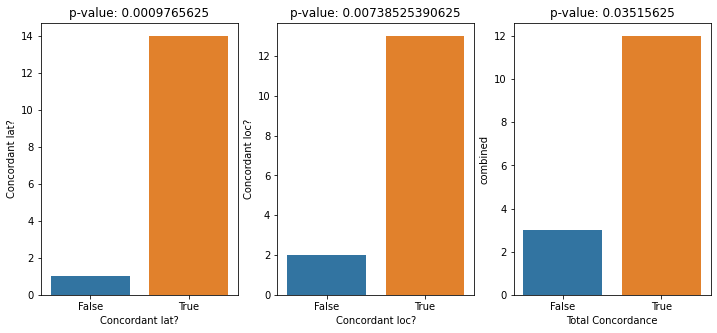

In [57]:
fig,axs = plt.subplots(1,3,figsize=(12,5))
to_plot = concordance.groupby('Concordant lat?')[['Concordant lat?']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['Concordant lat?'],ax=axs[0])
# obs = concordance.groupby('Concordant lat?')[['combined']].count()
obs = concordance['Concordant lat?']
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue
# plt.ylabel('Patients')
plt.xlabel('Lat Concordance')
axs[0].set_title(f'p-value: {p}')

to_plot = concordance.groupby('Concordant loc?')[['Concordant loc?']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['Concordant loc?'],ax=axs[1]) 
# obs = concordance.groupby('Concordant loc?')[['combined']].count()
obs = concordance['Concordant loc?']
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue

# plt.ylabel('Patients')
plt.xlabel('Loc Concordance')
axs[1].set_title(f'p-value: {p}')

to_plot = concordance.groupby('combined')[['combined']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['combined'],ax=axs[2])
# obs = concordance.groupby('combined')[['combined']].count()
obs = concordance.combined
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue

plt.xlabel('Total Concordance')
axs[2].set_title(f'p-value: {p}')